# Previously, we've seen...

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
train = pd.read_csv('Titanic_TRAIN.csv')

In [12]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
means = train.groupby('Pclass')['Age'].mean()

In [14]:
def fill(class_age):
    if pd.isnull(class_age[1]):
        return means[class_age[0]]
    return class_age[1]

In [15]:
train['Age'] = train[['Pclass', 'Age']].apply(fill, axis=1)

In [16]:
train.drop(['Cabin'], axis= 1, inplace= True)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [19]:
train.dropna(subset= ['Embarked'], inplace= True)

In [20]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

#### Then trained (considering WITH dummies)

Got an accuracy score ~ **82%**

###  

# <font color= "#00e88f" face= 'Nexa' size= 10> From now - We'll improve the Accuracy

###  

Taking the single `Train` as our **Whole** dataset - so that we can compare the Acc to other one.

In [21]:
train.head(16)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


In [22]:
train.drop('PassengerId', axis= 1, inplace= True)

In [23]:
train.head(16)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


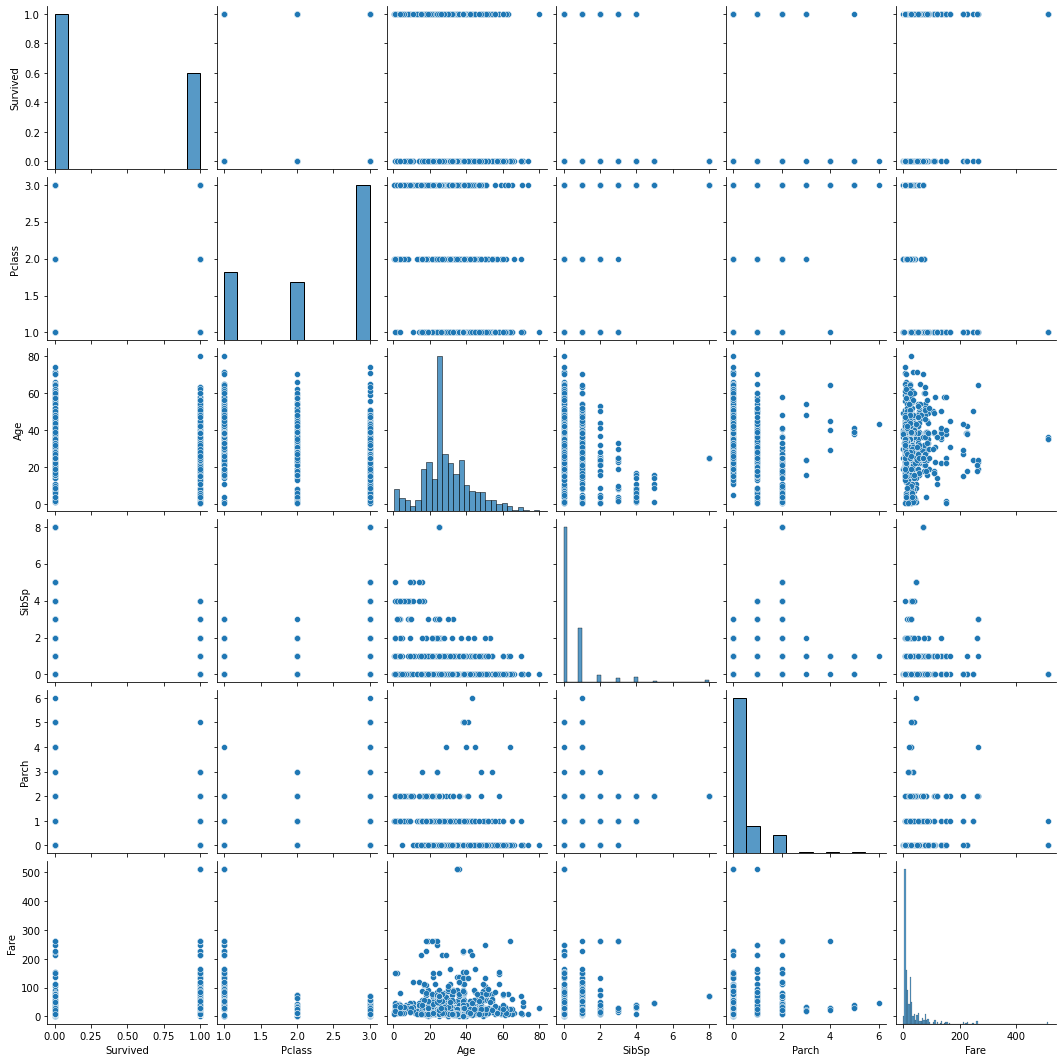

In [24]:
sns.pairplot(train)

In [25]:
train.head(16)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
5,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C


In [26]:
'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
def get_prefix(name):
    return name.split(',')[-1].strip().split(".")[0]

In [27]:
pre_fixes = train.Name.apply(get_prefix)

In [28]:
pre_fixes.value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Don               1
Jonkheer          1
Lady              1
Ms                1
Mme               1
Capt              1
the Countess      1
Name: Name, dtype: int64

In [29]:
train['Post'] = pre_fixes

In [30]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Post
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr
5,0,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,C,Mrs


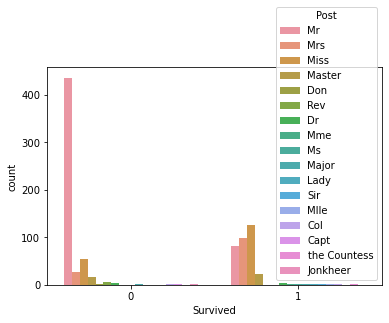

In [31]:
sns.countplot(x= "Survived", data= train, hue= "Post");

In [32]:
pre_fixes.value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Don               1
Jonkheer          1
Lady              1
Ms                1
Mme               1
Capt              1
the Countess      1
Name: Name, dtype: int64

In [37]:
mapper = {'Mr': "Mr",
          'Sir' : "Mr",
          'Mrs' : "Mrs",
          'Mme' : "Mrs",
          'Miss' : "Miss",
          'Lady' : "Miss",
          'Ms' : "Miss",
          'the Countess' : "Miss",
          'Master' : "Master",
          'Dr' : "Dr",
          'Rev' : "Rev",
          'Col' : "Major",
          'Major' : "Major",
          'Mlle' : "Major",
          'Capt' : "Major",
          'Don' : "Don",
          'Jonkheer' : "Don"}

In [38]:
mapper

{'Mr': 'Mr',
 'Sir': 'Mr',
 'Mrs': 'Mrs',
 'Mme': 'Mrs',
 'Miss': 'Miss',
 'Lady': 'Miss',
 'Ms': 'Miss',
 'the Countess': 'Miss',
 'Master': 'Master',
 'Dr': 'Dr',
 'Rev': 'Rev',
 'Col': 'Major',
 'Major': 'Major',
 'Mlle': 'Major',
 'Capt': 'Major',
 'Don': 'Don',
 'Jonkheer': 'Don'}

In [45]:
train.Post = train['Post'].map(mapper)

In [47]:
train.Post.value_counts()

Mr        518
Miss      184
Mrs       125
Master     40
Major       7
Dr          7
Rev         6
Don         2
Name: Post, dtype: int64

### Doing that on the tickets

In [83]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
234604      1
19952       1
250648      1
250643      1
347087      1
Name: Ticket, Length: 680, dtype: int64

In [84]:
def special(tick):
    tick = tick.strip().split(" ")
    if len(tick) == 1:
        return np.nan
    return tick[0].replace(".", '').replace(" ", '').replace('/', '')

In [85]:
train.Ticket.apply(special).value_counts()

PC         60
CA         41
A5         21
SOTONOQ    15
STONO      12
WC         10
SCPARIS     7
A4          7
SOC         6
STONO2      6
C           5
FCC         5
SCParis     4
WEP         3
SCAH        3
SOPP        3
PP          3
SOTONO2     2
PPP         2
SWPP        2
Fa          1
FC          1
SCOW        1
SOP         1
SP          1
SCA4        1
CASOTON     1
SC          1
AS          1
Name: Ticket, dtype: int64

In [86]:
train['Ticket_class'] = train.Ticket.apply(special)
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Post,Ticket_class
0,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S,Mr,A5
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,Mrs,PC
2,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S,Miss,STONO2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S,Mrs,NaN
4,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S,Mr,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S,Rev,NaN
887,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S,Miss,NaN
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S,Miss,WC
889,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C,Mr,NaN


In [88]:
train_dummies = pd.get_dummies(train, columns= ['Sex', 'Embarked', 'Pclass', 'Post', 'Ticket_class'], drop_first= True).drop(['Name', 'Ticket'], axis= 1)

In [89]:
train_dummies

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,...,Ticket_class_SOP,Ticket_class_SOPP,Ticket_class_SOTONO2,Ticket_class_SOTONOQ,Ticket_class_SP,Ticket_class_STONO,Ticket_class_STONO2,Ticket_class_SWPP,Ticket_class_WC,Ticket_class_WEP
0,0,22.00000,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,38.00000,1,0,71.2833,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.00000,0,0,7.9250,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,35.00000,1,0,53.1000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.00000,0,0,8.0500,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.00000,0,0,13.0000,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
887,1,19.00000,0,0,30.0000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,25.14062,1,2,23.4500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
889,1,26.00000,0,0,30.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training time!

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [97]:
X = train_dummies.drop('Survived', axis= 1)
y = train_dummies['Survived']

In [98]:
X

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Post_Dr,...,Ticket_class_SOP,Ticket_class_SOPP,Ticket_class_SOTONO2,Ticket_class_SOTONOQ,Ticket_class_SP,Ticket_class_STONO,Ticket_class_STONO2,Ticket_class_SWPP,Ticket_class_WC,Ticket_class_WEP
0,22.00000,1,0,7.2500,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,38.00000,1,0,71.2833,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.00000,0,0,7.9250,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,35.00000,1,0,53.1000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.00000,0,0,8.0500,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,19.00000,0,0,30.0000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,25.14062,1,2,23.4500,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
889,26.00000,0,0,30.0000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [137]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

In [138]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [139]:
model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

### 

In [140]:
model.predict(Xtest)

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [141]:
from sklearn.metrics import accuracy_score

In [142]:
accuracy_score(ytest, model.predict(Xtest))

0.7925170068027211